# Sklearn

## Importações

In [19]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Dataset

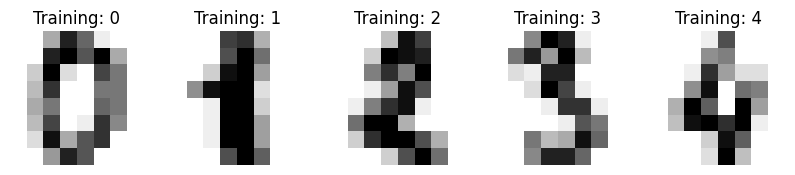

In [20]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Treinamento

In [21]:
# achatar as imagens
n_samples = len(digits.images) # quantidade total de amostras
data = digits.images.reshape((n_samples, -1))

# Crie um classificador: um classificador de vetor de suporte
clf = DecisionTreeClassifier()

# Divida os dados em 50% de treinamento e 50% de subconjuntos de teste
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# treinando nosso modelo
clf.fit(X_train, y_train)

# Preveja o valor do dígito no subconjunto de teste
predicted = clf.predict(X_test)

# Alguns Testes de Validação

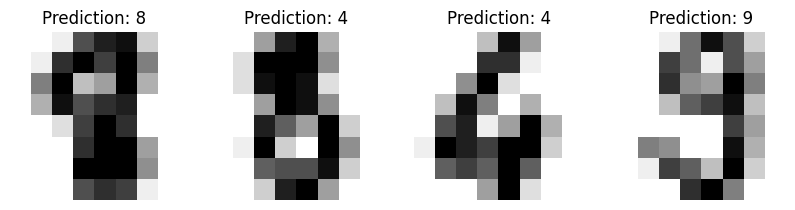

In [22]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


In [23]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        88
           1       0.80      0.54      0.64        91
           2       0.91      0.69      0.78        86
           3       0.64      0.74      0.68        91
           4       0.76      0.80      0.78        92
           5       0.58      0.74      0.65        91
           6       0.85      0.84      0.84        91
           7       0.89      0.73      0.80        89
           8       0.52      0.61      0.57        88
           9       0.67      0.74      0.70        92

    accuracy                           0.73       899
   macro avg       0.75      0.73      0.74       899
weighted avg       0.75      0.73      0.74       899




Matriz de Confusão:
[[80  0  0  1  1  4  2  0  0  0]
 [ 1 49  4  8 13  2  1  0  6  7]
 [ 1  3 59  9  1  0  3  0  8  2]
 [ 0  4  0 67  0  4  0  4 10  2]
 [ 6  0  0  0 74  4  3  1  3  1]
 [ 0  1  0  1  1 67  0  0  4 17]
 [ 1  2  0  2  0  1 76  0  9  0]
 [ 0  0  0  6  2  8  0 65  7  1]
 [ 0  0  2  6  5 12  4  2 54  3]
 [ 0  2  0  5  1 13  0  1  2 68]]


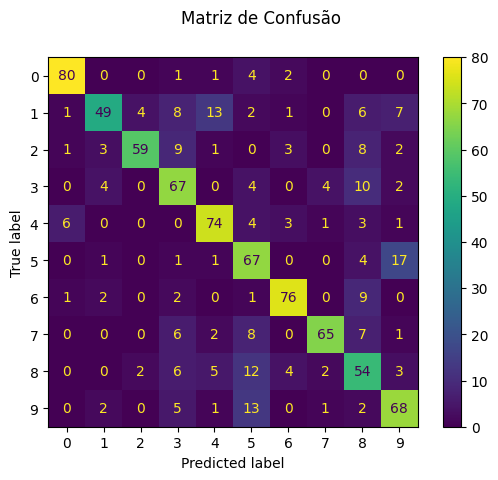

In [24]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Matriz de Confusão")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()


# pyXAI

## Instalçoes e Importações

In [ ]:
!pip install pyxai -q

In [25]:
from pyxai import Learning, Explainer, Tools

In [26]:
feature_names = digits.feature_names

#### Explicação Geral

Decision Tree Model: Informa que o modelo utilizado é uma árvore de decisão, confirmando o tipo de algoritmo treinado.

nFeatures: 64: Refere-se ao número de características (features) utilizadas pelo modelo. No caso do dataset de dígitos, cada imagem foi convertida em um vetor de 64 valores (8x8 pixels), então esse número representa a quantidade total de pixels da imagem que são usados como entrada para o modelo.

nNodes: 94: Esse número refere-se à quantidade total de nós na árvore de decisão. Um nó é um ponto de decisão na árvore, onde o modelo escolhe uma característica para fazer uma divisão que separa os dados em diferentes classes.

nVariables: 93: Esse valor representa a quantidade de variáveis ou divisões que o modelo fez ao construir a árvore. Cada vez que a árvore faz uma decisão, ela usa uma variável (um pixel neste caso) para dividir os dados.

In [27]:
learner, model = Learning.import_models(clf, feature_names)


#--------------- Explicador ----------------
#Para a avaliação número 0:
#**Modelo de árvore de decisão**
#nCaracterísticas: 64
#nNós: 94
#nVariáveis: 93

---------------   Explainer   ----------------
For the evaluation number 0:
**Decision Tree Model**
nFeatures: 64
nNodes: 94
nVariables: 93



In [33]:
import numpy as np
from sklearn import datasets
import pandas as pd

# Carregar o dataset digits
digits = datasets.load_digits()

# Aplanar as imagens para transformar em vetores (igual você já fez antes)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Combinar os dados com as labels (rótulos) e salvar em um dataframe
df = pd.DataFrame(data)
df['label'] = digits.target  # Adiciona a coluna de rótulos

# Salvar o dataframe em um arquivo CSV
dataset_filename = "digits_dataset.csv"
df.to_csv(dataset_filename, index=False)

print(f"Dataset salvo como {dataset_filename}")


Dataset salvo como digits_dataset.csv


In [38]:
#instance, prediction = learner.get_instances(model, n=1, correct=True, predictions=[0], dataset="/content/digits_dataset.csv")

In [55]:
instance, prediction = learner.get_instances(model, n=1, correct=True, predictions=[0],dataset="/content/digits_dataset.csv")
print('Número da Classe: ', prediction)

---------------   Instances   ----------------
number of instances selected: 1
----------------------------------------------
Número da Classe:  0


In [40]:
explainer = Explainer.decision_tree(model, instance)
print("instance:", instance)


"""
Esse resultado mostra uma instância (um exemplo) dos dados de dígitos após serem achatados.
Cada valor no array corresponde à intensidade de um pixel em uma imagem 8x8 de um dígito manuscrito.
"""

instance: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [56]:
if len(explainer.binary_representation) < 15:
    print("binary representation: ", explainer.binary_representation)
print("prediction:", prediction)
print("len binary representation", len(explainer.binary_representation))


prediction: 0
len binary representation 93


In [60]:
direct_reason = explainer.direct_reason()
print("\nlen direct:", len(direct_reason))
print("is a reason:", explainer.is_reason(direct_reason))
print("to features", explainer.to_features(direct_reason))



len direct: 4
is a reason: True
to features ('pixel_4_4 <= 0.5', 'pixel_4_5 > 0.5', 'pixel_5_2 > 7.5', 'pixel_6_2 > 5.5')


In [59]:
sufficient_reason = explainer.sufficient_reason(n=1)
print("\nlen sufficient reason:", len(sufficient_reason))
print("to features", explainer.to_features(sufficient_reason))
print("is sufficient_reason (for max 50 checks): ", explainer.is_sufficient_reason(sufficient_reason, n_samples=50))
print()
minimal = explainer.minimal_sufficient_reason()
print("\nminimal:", len(minimal))
print("is sufficient_reason (for max 50 checks): ", explainer.is_sufficient_reason(sufficient_reason, n_samples=50))

print("\nnecessary literals: ", explainer.necessary_literals())
print("\nrelevant literals: ", explainer.relevant_literals())

sufficient_reasons_per_attribute = explainer.n_sufficient_reasons_per_attribute()
print("\nsufficient_reasons_per_attribute:", sufficient_reasons_per_attribute)

constractive_reasons = explainer.contrastive_reason(n=Explainer.ALL)
print("\nnb constractive_reasons:", len(constractive_reasons))

all_are_contrastive = True
for contrastive in constractive_reasons:
    if not explainer.is_contrastive_reason(contrastive):
        print(f"{contrastive} is not a contrastive reason")
        all_are_contrastive = False

if all_are_contrastive:
    print("All contrastive are ok")

#explainer.visualisation.gui()


len sufficient reason: 4
to features ('pixel_4_4 <= 0.5', 'pixel_4_5 > 0.5', 'pixel_5_2 > 7.5', 'pixel_6_2 > 5.5')
is sufficient_reason (for max 50 checks):  True


minimal: 4
is sufficient_reason (for max 50 checks):  True

necessary literals:  [-1, 2, 5, 9]

relevant literals:  []

sufficient_reasons_per_attribute: {9: 1, 2: 1, 5: 1, -1: 1}

nb constractive_reasons: 4
All contrastive are ok
